In [1]:
from emnist import extract_training_samples
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models, layers
import matplotlib.pyplot as plt

In [2]:
images, labels = extract_training_samples('letters')

In [3]:
num_classes = 37
print(images.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)


In [4]:
num_images = images.shape[0]
im_dimention = 28
images = images.reshape(num_images, im_dimention, im_dimention, 1).astype('float32')/255
labels = labels.reshape(num_images, 1)
labels = labels - 1

In [5]:
print(images.shape)
print(labels.shape)

(124800, 28, 28, 1)
(124800, 1)


In [6]:
train_X, test_X, train_y, test_y = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
train_y = to_categorical(train_y, num_classes=num_classes)
test_y = to_categorical(test_y, num_classes=num_classes)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(37, activation='softmax'))

c:\Users\Natal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_X, train_y, validation_split=0.1, batch_size=128, epochs=10)

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6397 - loss: 1.2513 - val_accuracy: 0.8991 - val_loss: 0.2963
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9114 - loss: 0.2615 - val_accuracy: 0.9204 - val_loss: 0.2371
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9305 - loss: 0.2053 - val_accuracy: 0.9197 - val_loss: 0.2411
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9393 - loss: 0.1748 - val_accuracy: 0.9344 - val_loss: 0.1946
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9449 - loss: 0.1561 - val_accuracy: 0.9325 - val_loss: 0.1978
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9504 - loss: 0.1386 - val_accuracy: 0.9300 - val_loss: 0.2093
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9557 - loss: 0.1203 - val_accuracy: 0.9348 - val_loss: 0.1993
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9574 - loss: 0.1115 - 

In [11]:
score = model.evaluate(test_X, test_y)
score

780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9350 - loss: 0.2050


[0.21265006065368652, 0.9344150424003601]

In [12]:
prediction = model.predict(test_X)


780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [13]:
alphabet_mapping = {i: chr(64 + i + 1) for i in range(0, 26)}

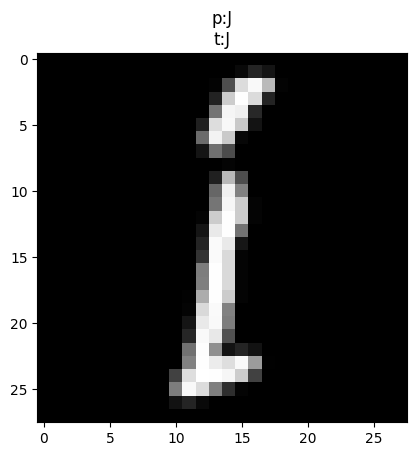

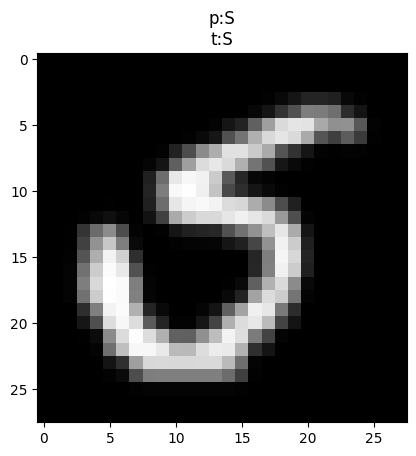

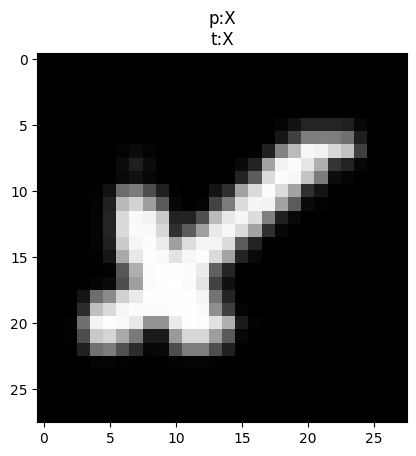

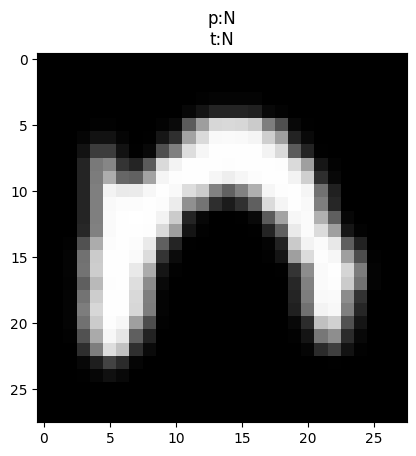

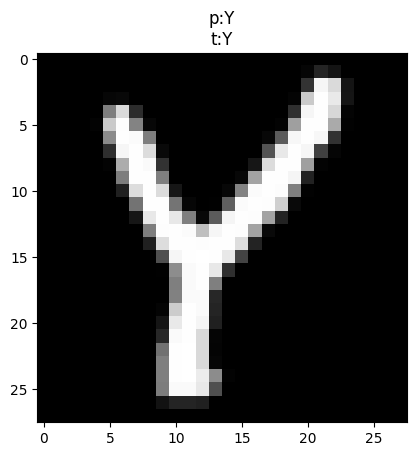

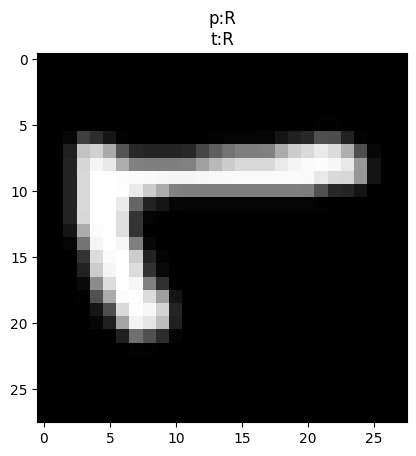

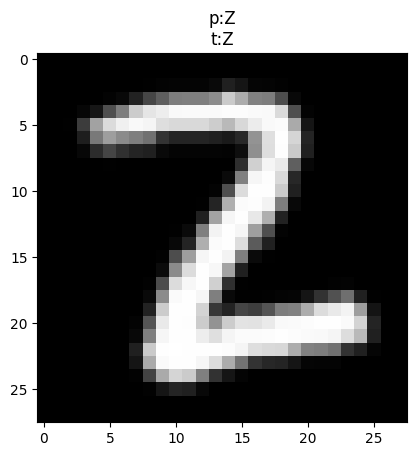

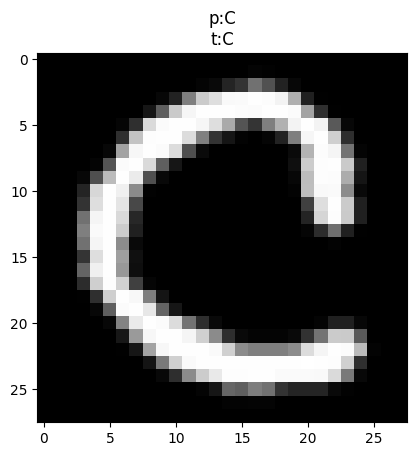

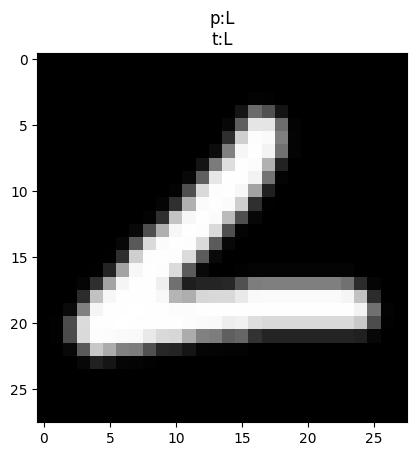

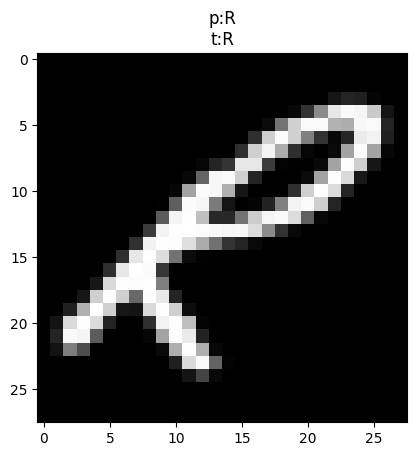

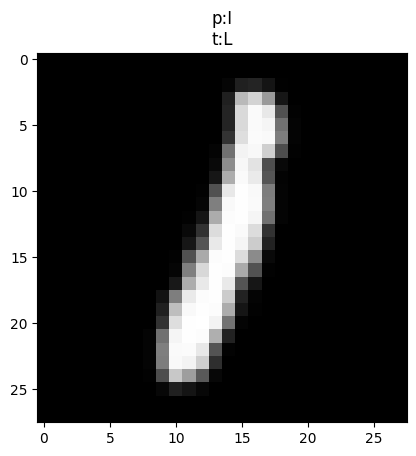

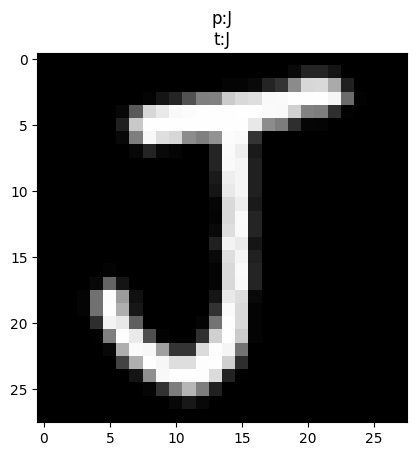

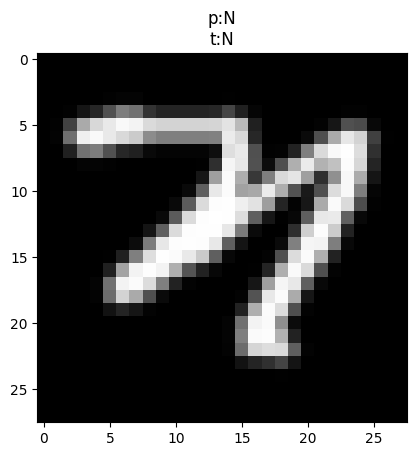

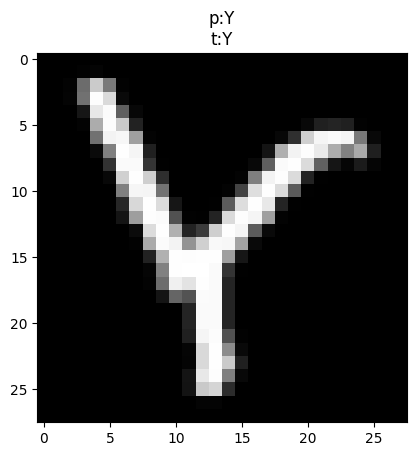

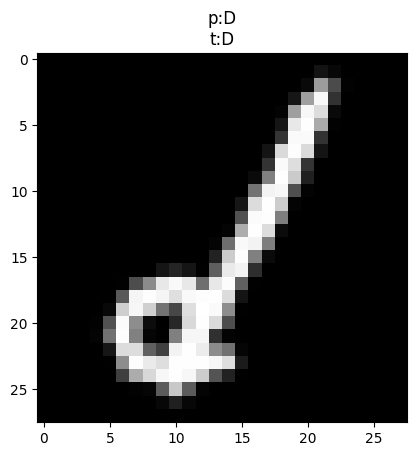

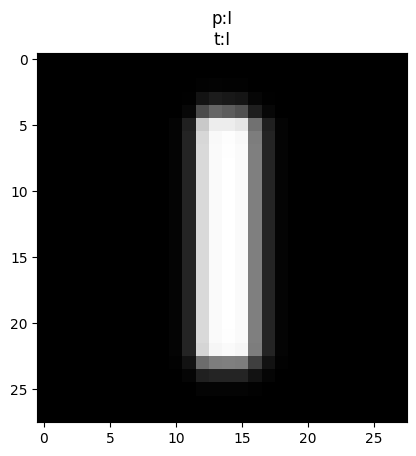

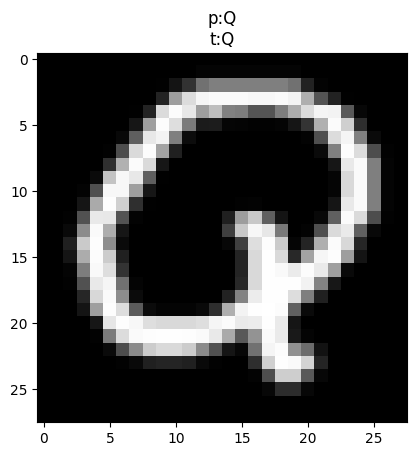

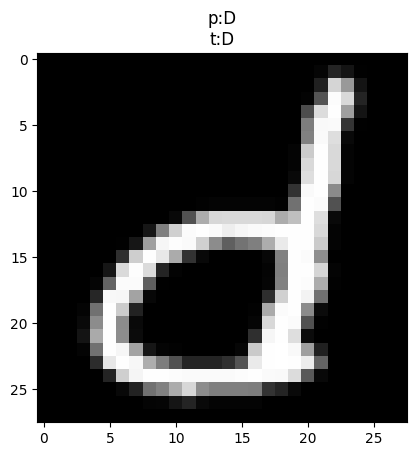

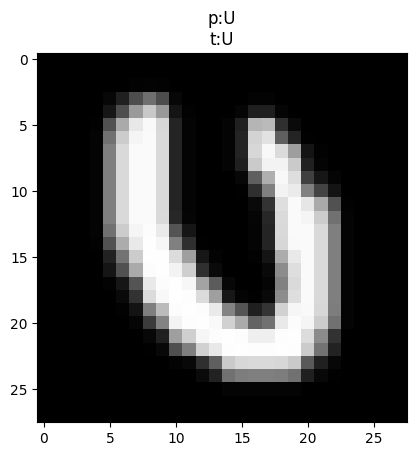

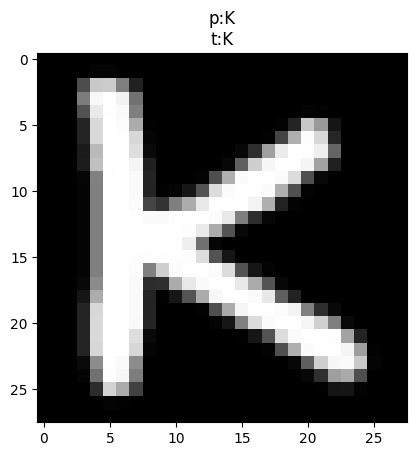

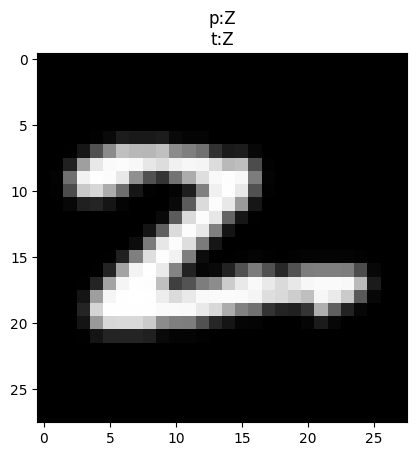

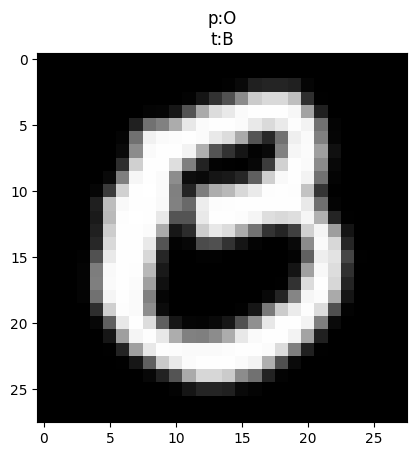

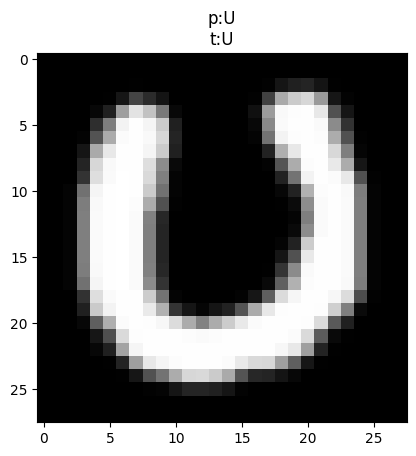

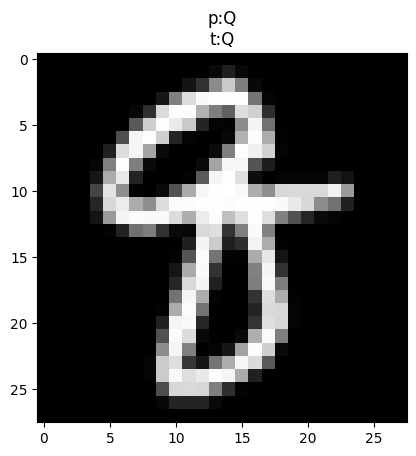

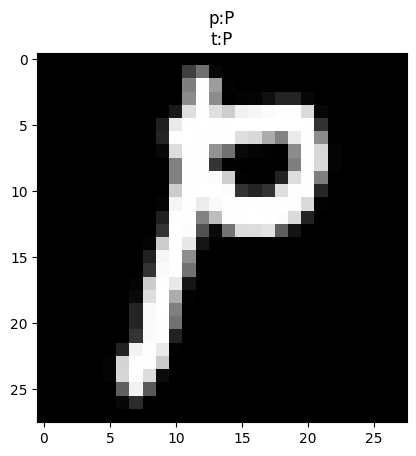

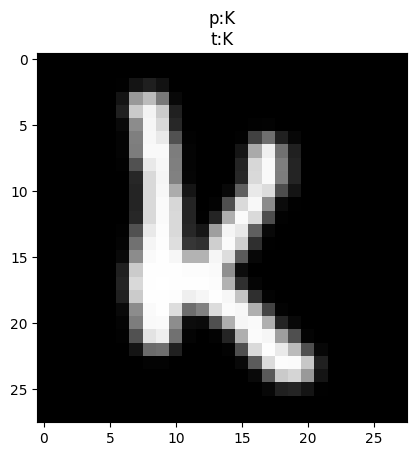

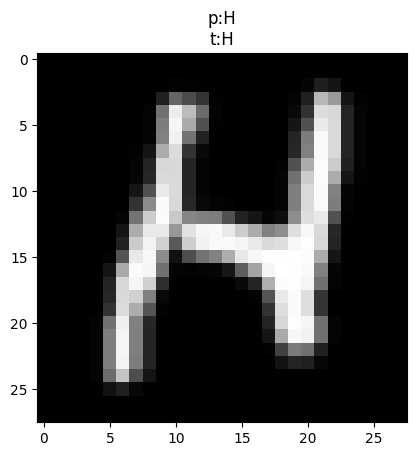

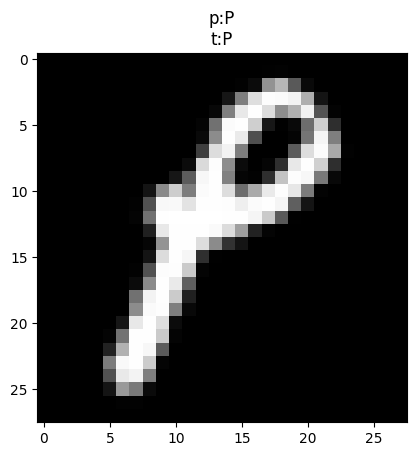

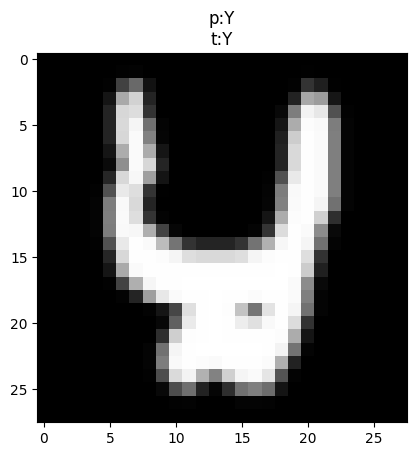

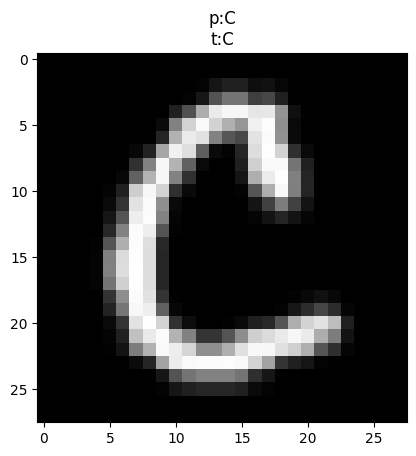

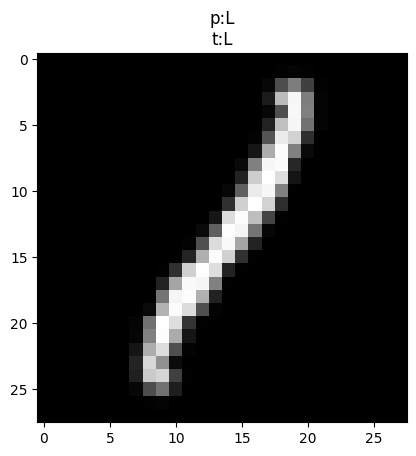

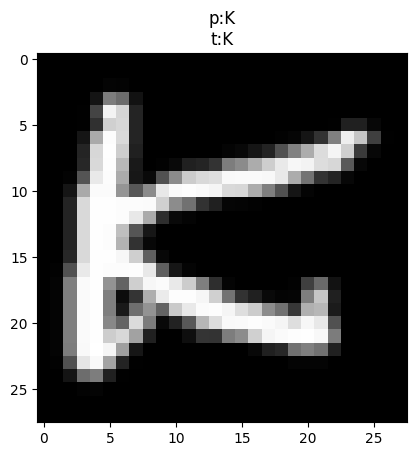

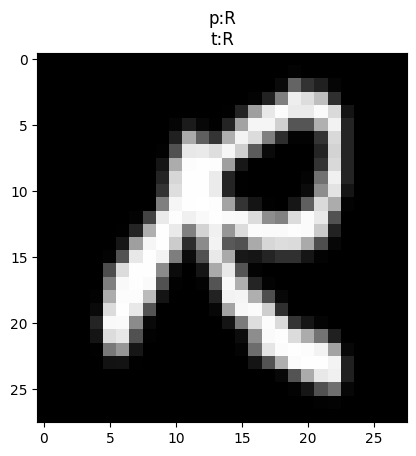

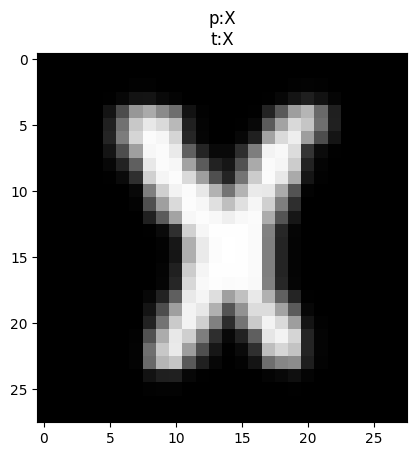

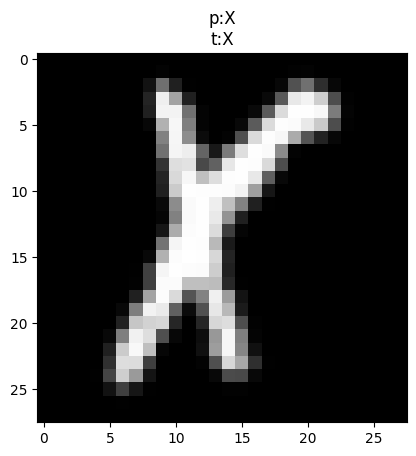

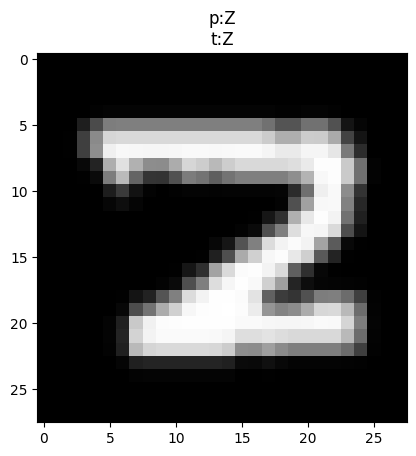

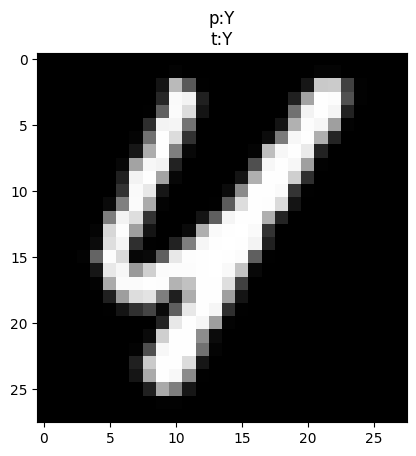

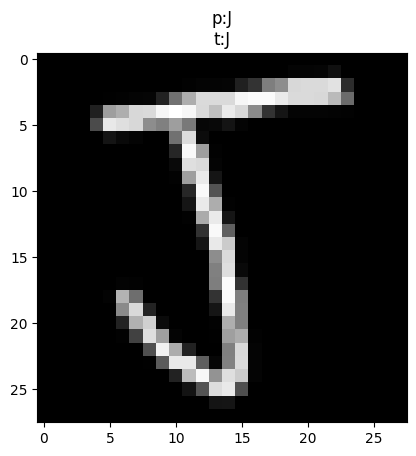

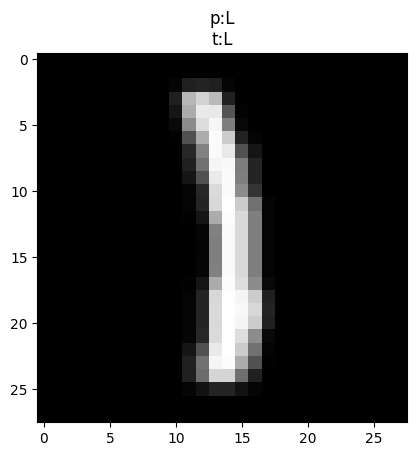

In [14]:
for i in range(1, 40):
  plt.imshow(test_X[i], cmap=plt.cm.gray)
  predicted_label = alphabet_mapping[prediction[i].argmax()]
  true_label = alphabet_mapping[test_y[i].argmax()]
  plt.title('p:' + predicted_label + '\nt:' + true_label)
  plt.show()

In [16]:
model.save('model/emnist-lib-model.keras')